<center><font size="16" ><b>Python Neural Network</b></font></center>

<img align="center" src="../imgs/python_NN.png" width="600"/>

<img src='../imgs/cnn_steps_predict.png' height='600'/>

In [245]:
from AI_Decomposed import *

In [246]:
image_file = './imgs/porche_2.jpg'
[height, width ,red, green, blue] = image_meta(image_file)

# green channel

width:  1200  height:  675


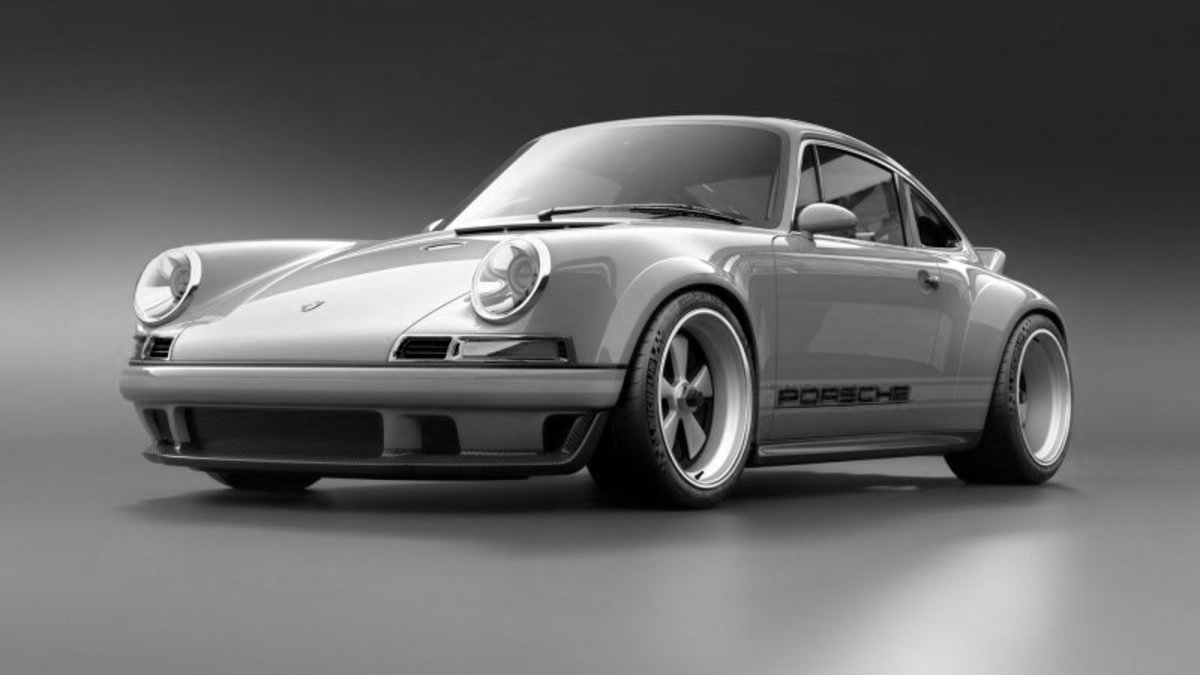

In [247]:
print('width: ', width, ' height: ', height)
display_channel(green, width)

# convolution

11.06 seconds to convolve  810000  pixel image


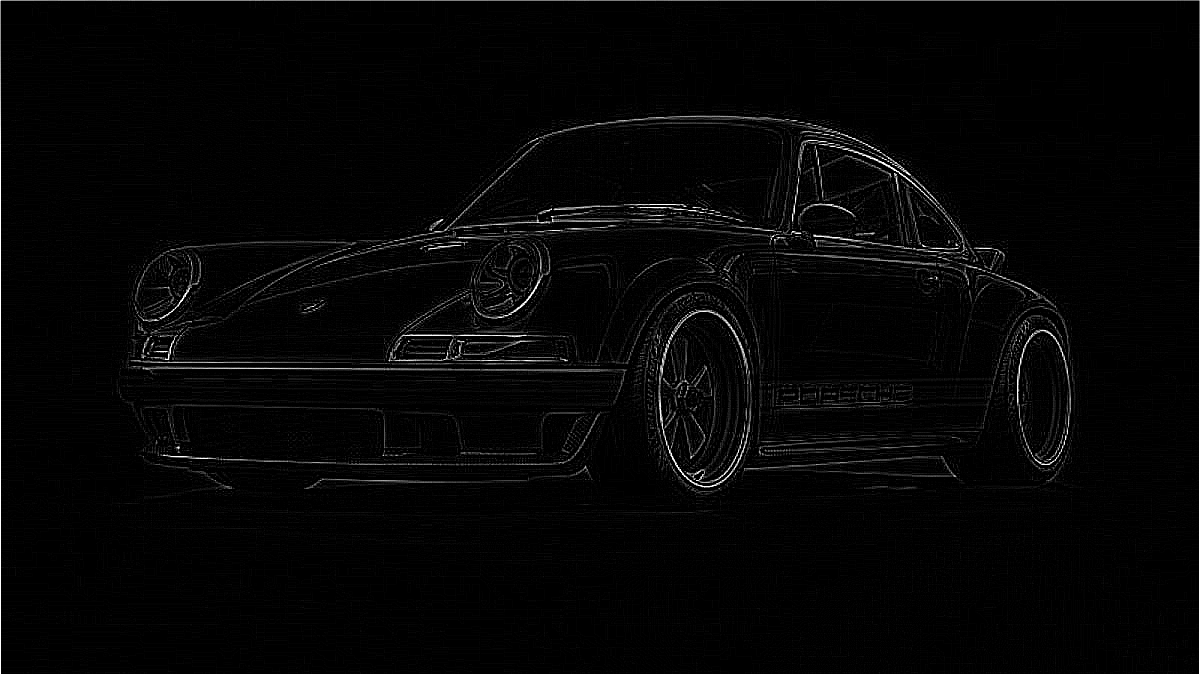

In [248]:
import time
start = time. time()
# create kernel
kernel = np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]])
# convert to matrix
green_array = np.asarray(green).reshape(height,width)
# add zero pad border
green_padded = np.pad(green_array, 1, 'constant')
# convolute
green_convolved = convolve(green_padded, kernel)
print(round(time.time() - start, 2), 'seconds to convolve ', (width* height),' pixel image')
# display convolution
green_convolved_list = list(np.array(green_convolved).flat)
display_channel(green_convolved_list, width)

# max pooling

width:  120  height:  67


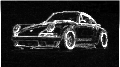

In [249]:
green_array = np.asarray(green_convolved_list).reshape(height,width)
green_pooled = pooling(green_array,ksize=(10,10))
print('width: ', green_pooled.shape[1], ' height: ', green_pooled.shape[0])
green_pooled_list = list(np.array(green_pooled).flat)
display_channel(green_pooled_list, green_pooled.shape[1])

In [250]:
w = green_pooled.shape[1]
h = green_pooled.shape[0]
print(h,' x ',w,'=',(w*h))

67  x  120 = 8040


In [251]:
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

In [ ]:
# adapted from https://iamtrask.github.io/2015/07/12/basic-python-network/

vector_length = len(green_pooled_list)
# X = np.array([[0,0,1],[0,1,1],[1,0,1],[1,1,1]])
X = np.array([
    green_pooled_list,
    np.random.random(len(green_pooled_list)).tolist(),
    np.random.random(len(green_pooled_list)).tolist(),
    
    # add some noise
    #green_pooled_list,
    np.random.random(len(green_pooled_list)).tolist(),
    
    green_pooled_list,    
    list(range(len(green_pooled_list))),
    green_pooled_list,
    list(range(len(green_pooled_list))),
])

# labels
y = np.array([[1],[0],[1],[0],[1],[0],[1],[0]])

np.random.seed(1)

# randomly initialize our weights with mean 0
layer_size = 50
error = list()
err_diff = list()

In [252]:
def small_brain(data,labels,layer_size):
    syn0 = 2*np.random.random((vector_length, layer_size)) - 1
    syn1 = 2*np.random.random((layer_size,1)) - 1
    previous_err = 1
    
    for j in range(120000):
        # Feed forward through layers 0, 1, and 2
        l0 = X
        l1 = nonlin(np.dot(l0,syn0))
        l2 = nonlin(np.dot(l1,syn1))
        # how much did we miss the target value?
        l2_error = y - l2           
        
        if (j% 2000) == 0:

            err = np.mean(np.abs(l2_error))
            error.append(err)
            diff = np.mean(previous_err - np.abs(l2_error))
            err_diff.append(diff)
        
            curr_error = np.abs(l2_error)
            
            print('\nError:', err)
            print('Diff:', diff)

        previous_err = np.abs(l2_error)

        # in what direction is the target value?
        # were we really sure? if so, don't change too much.
        l2_delta = l2_error * nonlin(l2,deriv=True)

        # how much did each l1 value contribute to the l2 error (according to the weights)?
        l1_error = l2_delta.dot(syn1.T)

        # in what direction is the target l1?
        # were we really sure? if so, don't change too much.
        l1_delta = l1_error * nonlin(l1,deriv=True)

        syn1 += l1.T.dot(l2_delta)
        syn0 += l0.T.dot(l1_delta)
    

In [237]:
import time
start = time.time()
small_brain(data=X,labels=y,layer_size=layer_size)
print('\n',round(time.time()),' seconds to induce simple neural network')


Error: 0.4604503687664798
Diff: 0.5395496312335202

Error: 0.0033412642223053695
Diff: 7.648283361233205e-07

Error: 0.002441209584494273
Diff: 2.744359953330217e-07

Error: 0.002034579856257907
Diff: 1.5249417825385458e-07

Error: 0.0017873358312820516
Diff: 1.0082961099974579e-07

Error: 0.0016157912832362822
Diff: 7.322962538130182e-08

Error: 0.0014874029597203035
Diff: 5.640990063889061e-08

Error: 0.00138644952749246
Diff: 4.524567124737362e-08

Error: 0.0013042559297999962
Diff: 3.737679698533644e-08

Error: 0.0012355802211571378
Diff: 3.1577896432083484e-08

Error: 0.001177037963066477
Diff: 2.7154894149269645e-08

Error: 0.0011263306092393383
Diff: 2.3687723648912703e-08

Error: 0.0010818334670438857
Diff: 2.0908526455242827e-08

Error: 0.0010423603568976284
Diff: 1.863913019206089e-08

Error: 0.0010070217453913557
Diff: 1.6756808773413516e-08

Error: 0.0009751353548761449
Diff: 1.5174510520745213e-08

Error: 0.0009461677141578836
Diff: 1.3828923751960033e-08

Error: 0.000919

In [233]:
np.max(error)

0.4604503687664798

In [234]:
np.min(error)

0.0014930774688116928

In [244]:
import numpy as np
from bokeh.plotting import figure, show
from bokeh.core.properties import value
from bokeh.io import show, output_notebook, reset_output
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.palettes import Spectral6
from bokeh.transform import dodge
from bokeh.transform import factor_cmap
reset_output()
output_notebook()

y = error
x = range(len(y))


p = figure(title="Log Error @ each 2000 iterations",
           x_range=(0, np.max(x)+10), y_range=(np.min(y), np.max(y)/100),
           background_fill_color="#fafafa")
p.circle(x, y, legend="y=error", line_color="olivedrab", size=10)
p.legend.location = "top_right"

show(p)

Loading BokehJS ...